In [23]:
#importing necessary libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np

In [24]:
#loading & preprocessing image data
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [25]:
#from tensorflow.python.ops.gen_array_ops import reshape
#making float values
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)

In [26]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [27]:
#normalizing data rgb codes by it to maxrgb value
x_train=x_train/255
x_test=x_test/255
print("shape of tarining:",x_train.shape)
print("shape of testing:",x_test.shape)

shape of tarining: (60000, 28, 28, 1)
shape of testing: (10000, 28, 28, 1)


In [28]:
#define model architecture
model=keras.Sequential([
keras.layers.Conv2D(32,(3,3),activation='relu'),
keras.layers.MaxPooling2D(pool_size=(2,2)),
keras.layers.Flatten(input_shape=(28,28)),
keras.layers.Dense(200,activation='relu'),
keras.layers.Dropout(0.3),
keras.layers.Dense(10,activation='softmax')])




In [29]:
from tensorflow.python import metrics
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
model.fit(x_train,y_train,epochs=2)

Epoch 1/2
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0088 - accuracy: 0.9969
Epoch 2/2
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0076 - accuracy: 0.9974


In [30]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.1673 - accuracy: 0.9489 - val_loss: 0.0594 - val_accuracy: 0.9814
Epoch 2/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0601 - accuracy: 0.9813 - val_loss: 0.0399 - val_accuracy: 0.9868
Epoch 3/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0407 - accuracy: 0.9867 - val_loss: 0.0395 - val_accuracy: 0.9857
Epoch 4/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0312 - accuracy: 0.9900 - val_loss: 0.0383 - val_accuracy: 0.9875
Epoch 5/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0231 - accuracy: 0.9925 - val_loss: 0.0351 - val_accuracy: 0.9885
Epoch 6/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0176 - accuracy: 0.9938 - val_loss: 0.0391 - val_accuracy: 0.9885
Epoch 7/10
1875/1875 [==============================] - 44s 24ms/step - loss: 0.0153 - accuracy: 0.9948 - val_loss: 0.0390 -

In [41]:
  #estimating model's performance
  test_loss,test_acc=model.evaluate(x_test,y_test)
  print("Loss=%.3f"%test_loss)
  print("accuracy=%.3f" %test_acc)

313/313 [==============================] - 2s 8ms/step - loss: 0.0405 - accuracy: 0.9906
Loss=0.040
accuracy=0.991


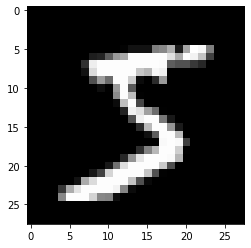

In [43]:
#showing img at position from dataset
image=x_train[0]
plt.imshow(np.squeeze(image),cmap='gray')
plt.show()

In [49]:
#predicting class of image
Image=image.reshape(1,image.shape[0],image.shape[1],image.shape[2])
predict_model=model.predict([Image])
print("predicted calss:",format(np.argmax(predict_model)))

1/1 [==============================] - 0s 18ms/step
predicted calss: 5
